In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from matplotlib.ticker import MultipleLocator


def plt_basics(xlim=None, ylim=None, figsize=None, set_aspect=True, tick=None):
  if figsize:
    plt.figure(figsize=figsize)

  if set_aspect:
    plt.gca().set_aspect('equal', adjustable='box')

  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid(True)

  if xlim:
    plt.xlim(xlim)
  if ylim:
    plt.ylim(ylim)

  if tick:
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(tick))
    ax.yaxis.set_major_locator(MultipleLocator(tick))

In [19]:
def plt_vector(tail, head):
  quiver_args = dict(angles='xy', scale_units='xy', scale=1)
  plt.quiver(*tail, *head, **quiver_args)


def plt_line(start, end, style='g--', alpha=0.5):
  plt.plot([start[0], end[0]], [start[1], end[1]], style, alpha=alpha)

In [20]:
x1 = [5, 2]
x2 = [1, 0]
x3 = [7, 4]
x4 = [4, 6]
x5 = [2, 1]

X = np.array([x1, x2, x3, x4, x5]).T
X.shape
X

(2, 5)

array([[5, 1, 7, 4, 2],
       [2, 0, 4, 6, 1]])

In [21]:
X_mean = np.mean(X, axis=1).reshape(-1, 1)
X = X - X_mean
X

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

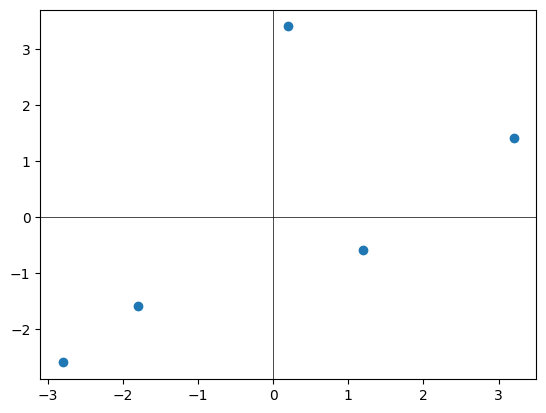

In [22]:
_ = plt.scatter(X[0], X[1])
_ = plt.axhline(0, color='k', linewidth=0.5)
_ = plt.axvline(0, color='k', linewidth=0.5)

In [23]:
n = X.shape[1]
C = X @ X.T / n
C.shape

(2, 2)

In [24]:
eigenvalues, eigenvectors = np.linalg.eig(C)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

eigenvalues
eigenvectors

array([7.52027396, 1.67972604])

array([[-0.70224734, -0.71193305],
       [-0.71193305,  0.70224734]])

In [25]:
W = eigenvectors

# W = np.array([
#     [1, 0],
#     [0, 1]
# ]).T

In [26]:
X.T.shape, W.shape

coefficients = X.T @ W
coefficients
coefficients.shape

((5, 2), (2, 2))

array([[-0.41553698, -1.27566807],
       [ 3.81731849,  0.16756946],
       [-3.24389776, -1.29503949],
       [-2.56102185,  2.24525435],
       [ 2.4031381 ,  0.15788375]])

(5, 2)

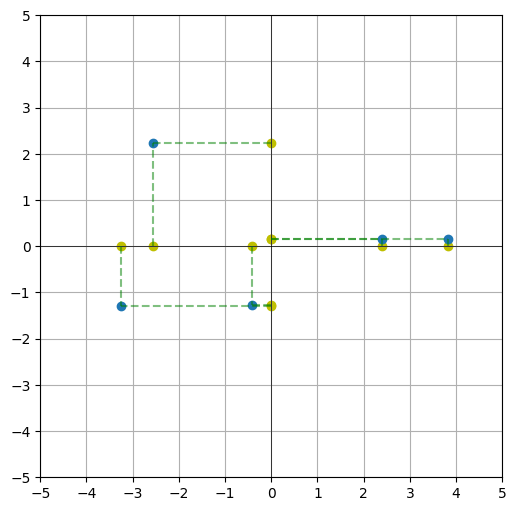

In [27]:
plt_basics(xlim=(-5, 5), ylim=(-5, 5), figsize=(6, 6), tick=1)
_ = plt.scatter(coefficients[:, 0], [0]*n, color="y")
_ = plt.scatter([0]*n, coefficients[:, 1], color="y")
_ = plt.scatter(coefficients[:, 0], coefficients[:, 1])

for i in range(n):
  blue = coefficients[i]
  plt_line(start=(blue[0], 0), end=blue)
  plt_line(start=(0, blue[1]), end=blue)

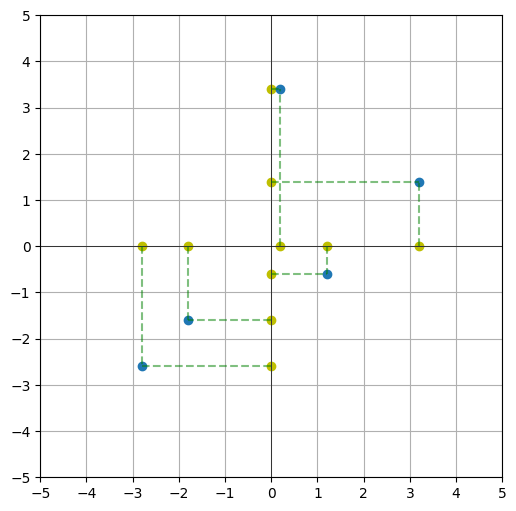

In [28]:
plt_basics(xlim=(-5, 5), ylim=(-5, 5), figsize=(6, 6), tick=1)
_ = plt.scatter(X[0], n*[0], color='y')
_ = plt.scatter([0]*n, X[1], color='y')
_ = plt.scatter(X[0], X[1])

for i in range(n):
  blue = X[:, i]
  plt_line(start=(blue[0], 0), end=blue)
  plt_line(start=(0, blue[1]), end=blue)

In [29]:
X.T
coefficients

array([[ 1.2, -0.6],
       [-2.8, -2.6],
       [ 3.2,  1.4],
       [ 0.2,  3.4],
       [-1.8, -1.6]])

array([[-0.41553698, -1.27566807],
       [ 3.81731849,  0.16756946],
       [-3.24389776, -1.29503949],
       [-2.56102185,  2.24525435],
       [ 2.4031381 ,  0.15788375]])

In [30]:
c1, c2 = coefficients.T
w1, w2 = W.T

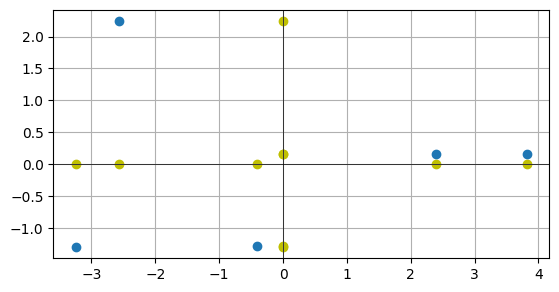

In [31]:
plt_basics()
_ = plt.scatter(c1, n*[0], color='y')
_ = plt.scatter(n*[0], c2, color='y')
_ = plt.scatter(c1, c2)

## Proxies `x' = c.w`

In [40]:
proxies_w1 = c1.reshape(-1, 1) @ w1.reshape(1, -1)
proxies_w2 = c2.reshape(-1, 1) @ w2.reshape(1, -1)

proxies_w1.shape
proxies_w2.shape

(5, 2)

(5, 2)

In [105]:
X_new = (proxies_w1 + proxies_w2).T
np.sqrt(np.mean((X-X_new)**2))  # root mean squred error

X
X_new

np.float64(4.550560269027492e-16)

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

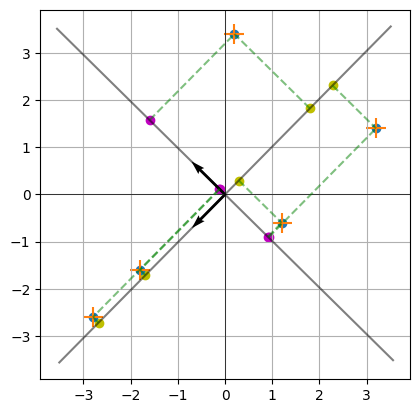

In [99]:
plt_basics()

_ = plt.scatter(proxies_w1[:, 0], proxies_w1[:, 1], color='y')
_ = plt.scatter(proxies_w2[:, 0], proxies_w2[:, 1], color='m')
_ = plt.scatter(X[0], X[1])
_ = plt.scatter(X_new[0], X_new[1], marker='+', s=200)

plt_vector(tail=(0, 0), head=w1)
plt_vector(tail=(0, 0), head=w2)
plt_line(start=w1*-5, end=w1*5, style="k-")
plt_line(start=w2*-5, end=w2*5, style="k-")

for i in range(n):
  plus = X_new[:, i]
  plt_line(start=proxies_w1[i], end=plus)
  plt_line(start=proxies_w2[i], end=plus)

## `c = x'w` and `x_proxy = c.w`

In [107]:
eigenvalues
eigenvectors

array([7.52027396, 1.67972604])

array([[-0.70224734, -0.71193305],
       [-0.71193305,  0.70224734]])

In [110]:
np.cumsum(eigenvalues) / sum(eigenvalues)

array([0.81742108, 1.        ])

In [142]:
k = 2
W = eigenvectors[:, :k]
W

array([[-0.70224734, -0.71193305],
       [-0.71193305,  0.70224734]])

In [143]:
coefficients = X.T @ W
coefficients

array([[-0.41553698, -1.27566807],
       [ 3.81731849,  0.16756946],
       [-3.24389776, -1.29503949],
       [-2.56102185,  2.24525435],
       [ 2.4031381 ,  0.15788375]])

In [144]:
X_ = coefficients @ W.T
X_.T
np.sqrt(np.mean((X - X_.T)**2))

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

np.float64(4.509747244882934e-16)